# **Big Sales Prediction using Random Forest Regressor**

### **Objective**

this project can predict the sale for given instance

# **Data Source**

YBI FOUNDATION github https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Big%20Sales%20Data.csv

## **Get Understanding about Data set**

### **There are 12 variables in dataset.**
1. Item—Identifier
2. Item_Weight
3. Item_Fat_Content
4. Item_Visibility
5. Item_Type
6. Item_MRP
7. Outlet_ldentifier
8. Outlet_Establishment_Year
9. Outlet_Size
10. Outlet_Location_Type
11. Outlet_Type
12. Item_Outlet_Sales



### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

### **importing Data**

In [ ]:
dataset=pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Big%20Sales%20Data.csv")

In [ ]:
dataset.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDT36         12.3          Low Fat         0.111448   
1           FDT36         12.3          Low Fat         0.111904   
2           FDT36         12.3               LF         0.111728   
3           FDT36         12.3          Low Fat         0.000000   
4           FDP12          9.8          Regular         0.045523   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0  Baking Goods   33.4874            OUT049                       1999   
1  Baking Goods   33.9874            OUT017                       2007   
2  Baking Goods   33.9874            OUT018                       2009   
3  Baking Goods   34.3874            OUT019                       1985   
4  Baking Goods   35.0874            OUT017                       2007   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1         436.608721  
1      Medium               Tier 2  Supermarket Type1         443.127721  
2      Medium               Tier 3  Supermarket Type2         564.598400  
3       Small               Tier 1      Grocery Store        1719.370000  
4      Medium               Tier 2  Supermarket Type1         352.874000

## **Getting information about the dataset**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
dataset.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11815.000000     14204.000000  14204.000000               14204.000000   
mean      12.788355         0.065953    141.004977                1997.830681   
std        4.654126         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.500000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       30.000000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count       14204.000000  
mean         2185.836320  
std          1827.479550  
min            33.290000  
25%           922.135101  
50%          1768.287680  
75%          2988.110400  
max         31224.726950

### **Checking For Null Values**

In [ ]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### **data visualization**

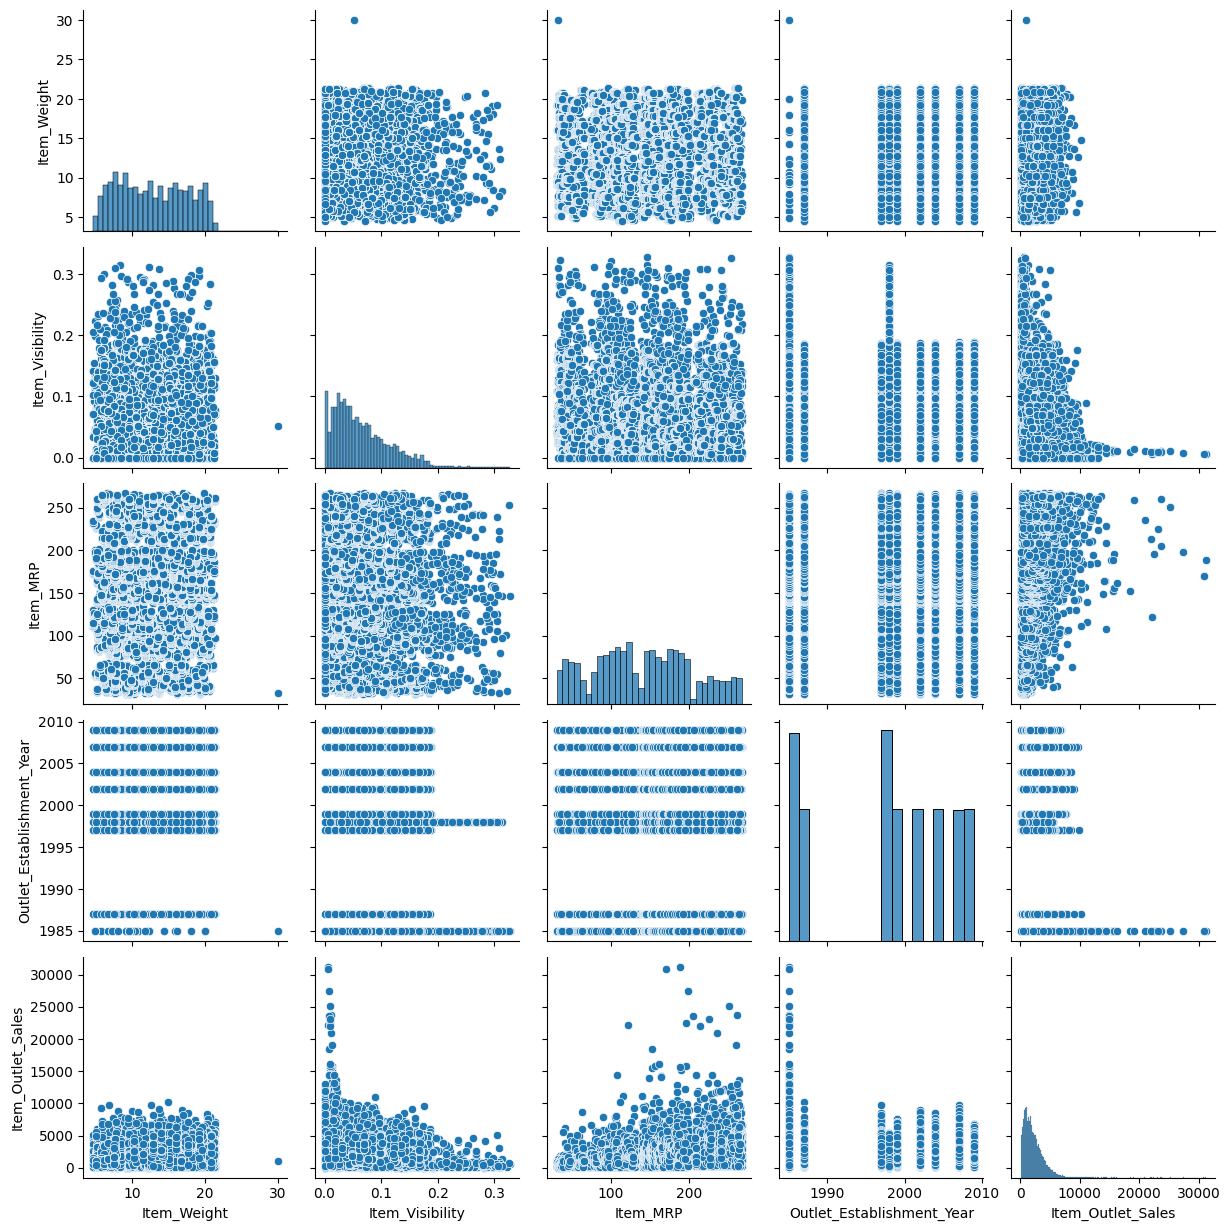

In [ ]:
sns.pairplot(dataset)
plt.show()


## **Data** preprocessing

In [ ]:
#here we will find which column have the missing value if it is more than 30% we will drop it
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
dataset.shape

(14204, 12)

In [ ]:
# here only one column that have  null value is we drop the column that is best as compare to use the dropona
#because it will delete all rows from each featurs
dataset.drop(columns=["Item_Weight"],axis=1,inplace=True)

In [ ]:
new_dataset=dataset

In [ ]:
new_dataset.head()

Item_Identifier Item_Fat_Content  Item_Visibility     Item_Type  Item_MRP  \
0           FDT36          Low Fat         0.111448  Baking Goods   33.4874   
1           FDT36          Low Fat         0.111904  Baking Goods   33.9874   
2           FDT36               LF         0.111728  Baking Goods   33.9874   
3           FDT36          Low Fat         0.000000  Baking Goods   34.3874   
4           FDP12          Regular         0.045523  Baking Goods   35.0874   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   
1            OUT017                       2007      Medium   
2            OUT018                       2009      Medium   
3            OUT019                       1985       Small   
4            OUT017                       2007      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1         436.608721  
1               Tier 2  Supermarket Type1         443.127721  
2               Tier 3  Supermarket Type2         564.598400  
3               Tier 1      Grocery Store        1719.370000  
4               Tier 2  Supermarket Type1         352.874000

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Fat_Content           14204 non-null  object 
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  object 
 8   Outlet_Location_Type       14204 non-null  object 
 9   Outlet_Type                14204 non-null  object 
 10  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.2+ MB


In [ ]:
#as Item_Identifier will be not a good feature so we can drop it
dataset.drop(columns=["Item_Identifier"],axis=1,inplace=True)

In [ ]:
dataset["Item_Fat_Content"].unique()

array(['Low Fat', 'LF', 'Regular', 'reg', 'low fat'], dtype=object)

In [ ]:
dict_for_fat_content={'Low Fat':0,'LF':0,'low fat':0,'Regular':1,'reg':1}
update_fat=dataset["Item_Fat_Content"].map(dict_for_fat_content)

In [ ]:
dataset["Item_Fat_Content"]=update_fat

In [ ]:
#item Type
dataset["Item_Type"].unique()

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [ ]:
Item_type_data=pd.get_dummies(dataset["Item_Type"])

In [ ]:
dataset=pd.concat([dataset,Item_type_data],axis=1)

In [ ]:
dataset.drop("Item_Type",axis=1,inplace=True)

In [ ]:
dataset.drop("Outlet_Identifier",axis=1,inplace=True)

In [ ]:
dataset["Outlet_Size"].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [ ]:
dict_outllet_size={"Medium":1,"Small":0,"High":2}
dataset["Outlet_Size"]=dataset["Outlet_Size"].map(dict_outllet_size)

In [ ]:
dataset.head()

Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0                 0         0.111448   33.4874                       1999   
1                 0         0.111904   33.9874                       2007   
2                 0         0.111728   33.9874                       2009   
3                 0         0.000000   34.3874                       1985   
4                 1         0.045523   35.0874                       2007   

   Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0            1               Tier 1  Supermarket Type1         436.608721   
1            1               Tier 2  Supermarket Type1         443.127721   
2            1               Tier 3  Supermarket Type2         564.598400   
3            0               Tier 1      Grocery Store        1719.370000   
4            1               Tier 2  Supermarket Type1         352.874000   

   Baking Goods  Breads  ...  Fruits and Vegetables  Hard Drinks  \
0          True   False  ...                  False        False   
1          True   False  ...                  False        False   
2          True   False  ...                  False        False   
3          True   False  ...                  False        False   
4          True   False  ...                  False        False   

   Health and Hygiene  Household   Meat  Others  Seafood  Snack Foods  \
0               False      False  False   False    False        False   
1               False      False  False   False    False        False   
2               False      False  False   False    False        False   
3               False      False  False   False    False        False   
4               False      False  False   False    False        False   

   Soft Drinks  Starchy Foods  
0        False          False  
1        False          False  
2        False          False  
3        False          False  
4        False          False  

[5 rows x 24 columns]

In [ ]:
dataset["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [ ]:
dict_outlet_location={"Tier 1":0,"Tier 2":1,"Tier 3":2}
dataset["Outlet_Location_Type"]=dataset["Outlet_Location_Type"].map(dict_outlet_location)

In [ ]:
dataset.head()

Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0                 0         0.111448   33.4874                       1999   
1                 0         0.111904   33.9874                       2007   
2                 0         0.111728   33.9874                       2009   
3                 0         0.000000   34.3874                       1985   
4                 1         0.045523   35.0874                       2007   

   Outlet_Size  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0            1                     0  Supermarket Type1         436.608721   
1            1                     1  Supermarket Type1         443.127721   
2            1                     2  Supermarket Type2         564.598400   
3            0                     0      Grocery Store        1719.370000   
4            1                     1  Supermarket Type1         352.874000   

   Baking Goods  Breads  ...  Fruits and Vegetables  Hard Drinks  \
0          True   False  ...                  False        False   
1          True   False  ...                  False        False   
2          True   False  ...                  False        False   
3          True   False  ...                  False        False   
4          True   False  ...                  False        False   

   Health and Hygiene  Household   Meat  Others  Seafood  Snack Foods  \
0               False      False  False   False    False        False   
1               False      False  False   False    False        False   
2               False      False  False   False    False        False   
3               False      False  False   False    False        False   
4               False      False  False   False    False        False   

   Soft Drinks  Starchy Foods  
0        False          False  
1        False          False  
2        False          False  
3        False          False  
4        False          False  

[5 rows x 24 columns]

In [ ]:
dataset["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
dict_for_outlet_type={"Supermarket Type1":0,"Supermarket Type2":1,"Grocery Store":3,"Supermarket Type3":4}
dataset["Outlet_Type"]=dataset["Outlet_Type"].map(dict_for_outlet_type)

### **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
x=dataset.drop("Item_Outlet_Sales",axis=1)
y=dataset["Item_Outlet_Sales"]

### **Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2529)

### **Modeling**

In [ ]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

### **Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)

In [ ]:
y_pred.shape

(2841,)

In [ ]:
y_test.shape

(2841,)

In [ ]:
r2_score(y_test,y_pred)

0.523852820129335

# **Get Visualization of Actual vs Predicted Result**

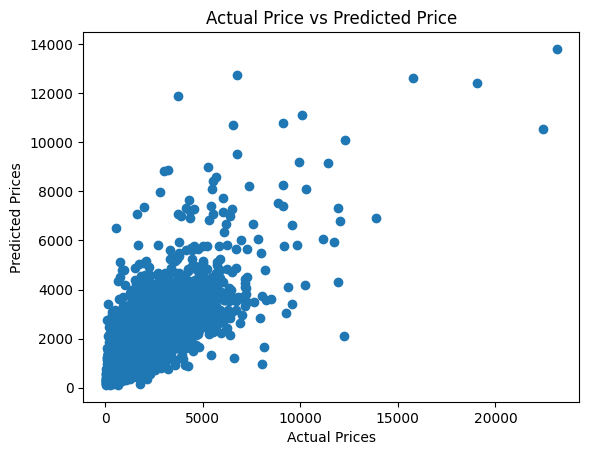

In [ ]:
import matplotlib. pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel( "Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()